<a href="https://colab.research.google.com/github/bhoomikadg26/Deeplearning/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


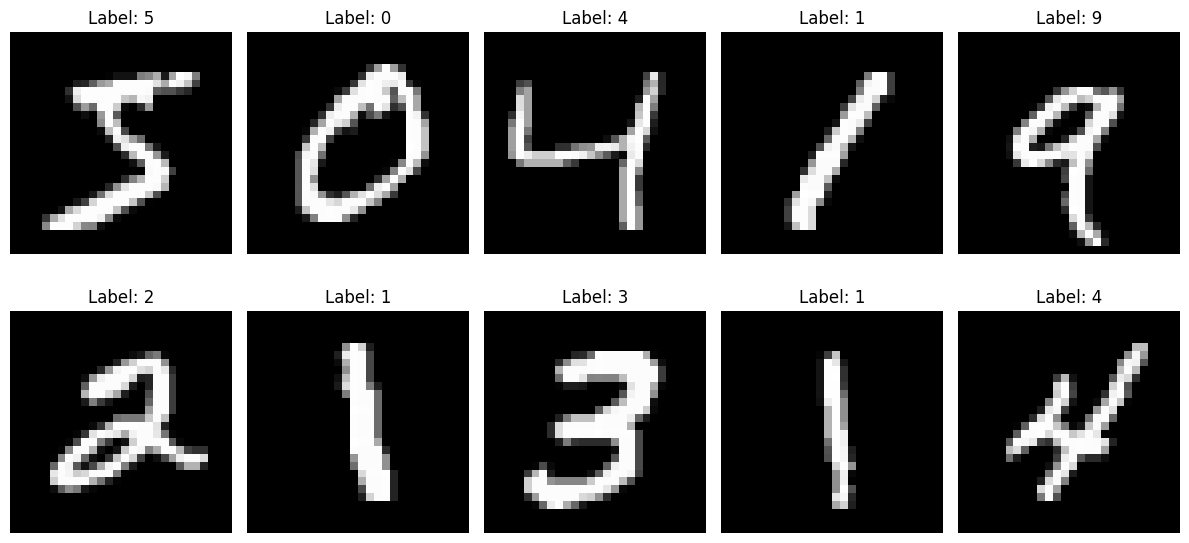

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8688 - loss: 0.4194 - val_accuracy: 0.9543 - val_loss: 0.1542
Epoch 2/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9642 - loss: 0.1141 - val_accuracy: 0.9667 - val_loss: 0.1122
Epoch 3/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9733 - loss: 0.0830 - val_accuracy: 0.9703 - val_loss: 0.1076
Epoch 4/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9811 - loss: 0.0596 - val_accuracy: 0.9712 - val_loss: 0.1047
Epoch 5/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9833 - loss: 0.0521 - val_accuracy: 0.9667 - val_loss: 0.1189
Epoch 6/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9869 - loss: 0.0420 - val_accuracy: 0.9710 - val_loss: 0.1121
Epoch 7/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9743 - val_loss: 0.1088
Epoch 8/50
4

Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       1.00      0.99      1.00      5842
           5       1.00      0.99      0.99      5421
           6       1.00      1.00      1.00      5918
           7       1.00      0.99      1.00      6265
           8       0.99      1.00      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.9

In [ ]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n], cmap='gray')
        axs[i, j].set_title(f"Label: {y_train[n]}")
        axs[i, j].axis('off')
        n += 1
plt.tight_layout()
plt.show()

# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep FF Neural Network architecture
model = Sequential(name="DFF-Model")  # Model
model.add(Input(shape=(784,), name='Input-Layer'))  # Input Layer
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))  # Output layer with softmax for 10 classes

# Compile keras model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit keras model on the dataset
model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    shuffle=True,
    validation_freq=1
)

# Apply the trained model to make predictions
# Predict class labels on training data
pred_labels_tr = np.argmax(model.predict(X_train), axis=1)

# Predict class labels on a test data
pred_labels_te = np.argmax(model.predict(X_test), axis=1)

# Model Performance Summary
print("\nModel Summary")
model.summary()

# Evaluation on Training Data
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

# Evaluation on Test Data
print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))


Shape of X_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000,)
Shape of X_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000,)


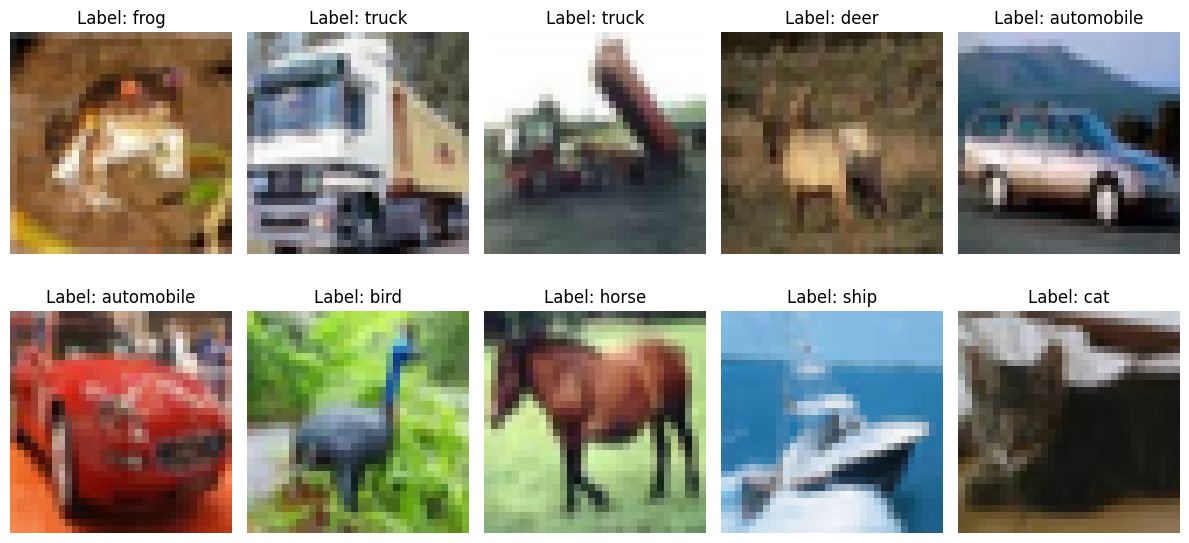

New shape of X_train:  (50000, 3072)
New shape of X_test:  (10000, 3072)
Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.2651 - loss: 2.0516 - val_accuracy: 0.3530 - val_loss: 1.7698
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3791 - loss: 1.7204 - val_accuracy: 0.3989 - val_loss: 1.6680
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.4136 - loss: 1.6303 - val_accuracy: 0.4300 - val_loss: 1.5969
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.4349 - loss: 1.5792 - val_accuracy: 0.4065 - val_loss: 1.6243
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4528 - loss: 1.5310 - val_accuracy: 0.4510 - val_loss: 1.5528
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.4649 - loss: 1.4884 - val_accuracy: 0.4427 - val_loss: 1.5600
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4829 - loss: 1.4386 - val_accuracy: 0.4702 - val_loss: 1.4999
Epoch 8/10

In [ ]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Flatten
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten label arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display first 10 images with labels
fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n])
        axs[i, j].set_title(f"Label: {class_names[y_train[n]]}")
        axs[i, j].axis('off')
        n += 1
plt.tight_layout()
plt.show()

# Normalize and flatten input data
X_train = X_train.reshape(50000, 32 * 32 * 3).astype("float32") / 255
X_test = X_test.reshape(10000, 32 * 32 * 3).astype("float32") / 255

print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design Deep Feedforward Neural Network
model = Sequential(name="DFF-CIFAR10-Model")
model.add(Input(shape=(3072,), name='Input-Layer'))
model.add(Dense(512, activation='relu', name='Hidden-Layer-1', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', name='Hidden-Layer-2', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-3', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    verbose=1,
    shuffle=True
)

# Predict labels
pred_labels_tr = np.argmax(model.predict(X_train), axis=1)
pred_labels_te = np.argmax(model.predict(X_test), axis=1)

# Model summary
print("\nModel Summary")
model.summary()

# Evaluation
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr, target_names=class_names))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te, target_names=class_names))
